In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import pandas as pd
import re
import cftime
from datetime import datetime
from dask.diagnostics import ProgressBar
from scipy.stats import t
from scipy.stats import linregress
from eofs.xarray import Eof
from eofs.examples import example_data_path
import calendar
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import gridspec
import matplotlib.path as mpath
from matplotlib.ticker import MaxNLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from types import SimpleNamespace

In [2]:
CVDP_era5 = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/CVDP_outputs/NAO/historical/historical_NAO/ERA5_1.cvdp_data.1940-2014.nc')
CVDP_era5['nao_pattern_djf']

<xarray.DataArray 'nao_pattern_djf' (lat: 721, lon: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float32 6kB 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    units:      hPa
    pcvar:      47.2%*
    long_name:  NAO spatial pattern (DJF)

regression map


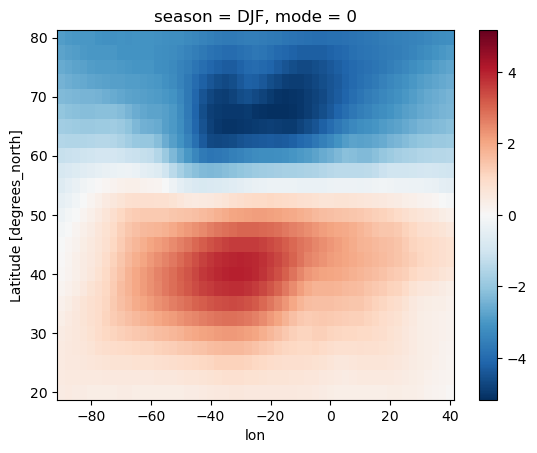

CVDP


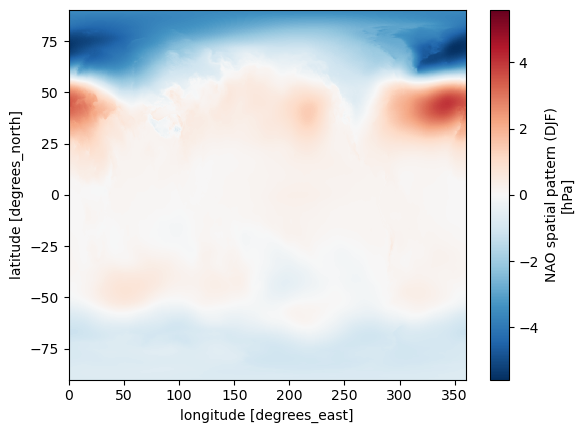

Variance explained (%): [45.18060719]
EOF_phys units: hPa, pcs_norm units: dimensionless


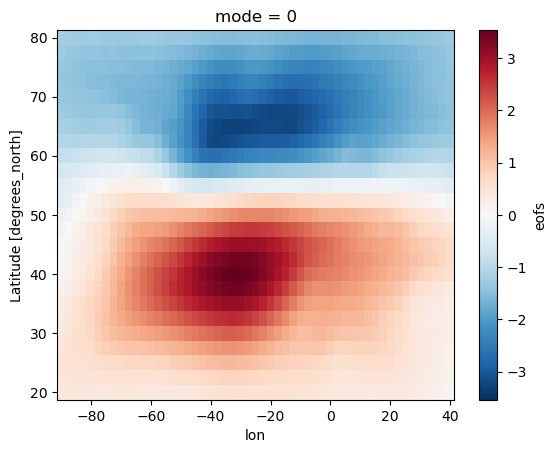

regression map


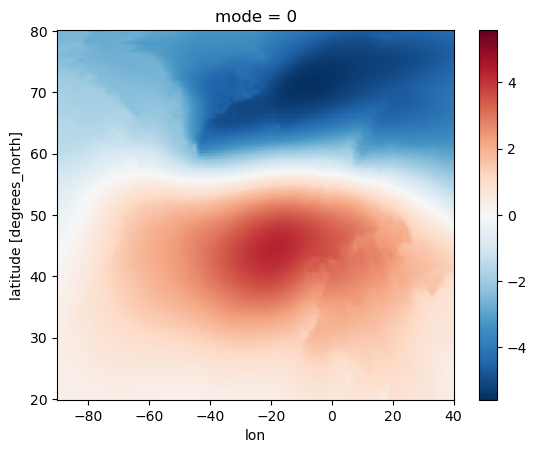

Variance explained (%): [47.40927437]
EOF_phys units: hPa, pcs_norm units: dimensionless


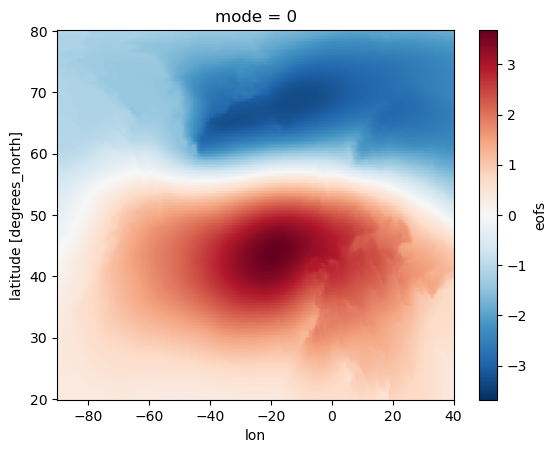

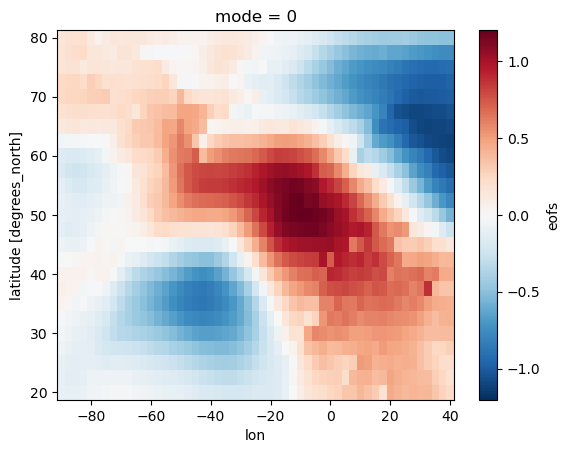

In [14]:
max_modes=1
had_anom = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/psl_anomalies/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_r12i1p1f3_DJF_anomaly_1850-2014.nc')['psl']
had_anom = had_anom.sel(lat=slice(20,80), lon=slice(-90,40))
had_anom = had_anom.rename({'year': 'time'})
had_anom = had_anom / 100

anomaly_trans = had_anom.transpose('time', 'lat', 'lon')

coslat = np.cos(np.deg2rad(anomaly_trans.coords['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[...,np.newaxis]

solver = Eof(anomaly_trans, weights=wgts)
EOF0 = solver.eofs(neofs=max_modes)

eigs = solver.eigenvalues(neigs=max_modes)
eigs_np = np.sqrt(eigs.values)  # convert to NumPy
EOF_phys_had = EOF0 * eigs_np[:, np.newaxis, np.newaxis]

# 4. Get PCs with unit variance (dimensionless indices)
#pcs_norm = solver.pcs(npcs=max_modes, pcscaling=2)

pc = solver.pcs(npcs=max_modes, pcscaling=1).sel(mode=0)

regression_map = (anomaly_trans * pc).mean(dim='time')
print('regression map')
regression_map.plot()
plt.show()


# 5. Variance explained (same regardless of scaling)
varfrac = solver.varianceFraction(neigs=max_modes) * 100

print("Variance explained (%):", varfrac.values)
print("EOF_phys units: hPa, pcs_norm units: dimensionless")

EOF_phys_had.plot()
#EOF0.plot()
plt.show()


max_modes=1
era5_anom = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/psl_anomalies/historical/era5/psl_mon_historical_era5_ensemble1_DJF_anomaly_1940-2014.nc')['psl']
era5_anom = era5_anom.sel(lat=slice(20,80), lon=slice(-90,40))
era5_anom = era5_anom.rename({'year': 'time'})
era5_anom = era5_anom / 100

anomaly_trans = era5_anom.transpose('time', 'lat', 'lon')

coslat = np.cos(np.deg2rad(anomaly_trans.coords['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[...,np.newaxis]

solver = Eof(anomaly_trans, weights=wgts)
EOF0 = solver.eofs(neofs=max_modes)

eigs = solver.eigenvalues(neigs=max_modes)
eigs_np = np.sqrt(eigs.values)  # convert to NumPy
EOF_phys_era5 = EOF0 * eigs_np[:, np.newaxis, np.newaxis]

# 4. Get PCs with unit variance (dimensionless indices)
#pcs_norm = solver.pcs(npcs=max_modes, pcscaling=2)

pc = solver.pcs(npcs=max_modes, pcscaling=1).sel(mode=0)

regression_map = (anomaly_trans * pc).mean(dim='time')
print('regression map')
regression_map.plot()
plt.show()

# 5. Variance explained (same regardless of scaling)
varfrac = solver.varianceFraction(neigs=max_modes) * 100

print("Variance explained (%):", varfrac.values)
print("EOF_phys units: hPa, pcs_norm units: dimensionless")

EOF_phys_era5.plot()
#EOF0.plot()
plt.show()

(EOF_phys_era5-EOF_phys_had).plot()
plt.show()


Variance explained (%): [42.52199877]
EOF_phys units: hPa, pcs_norm units: dimensionless


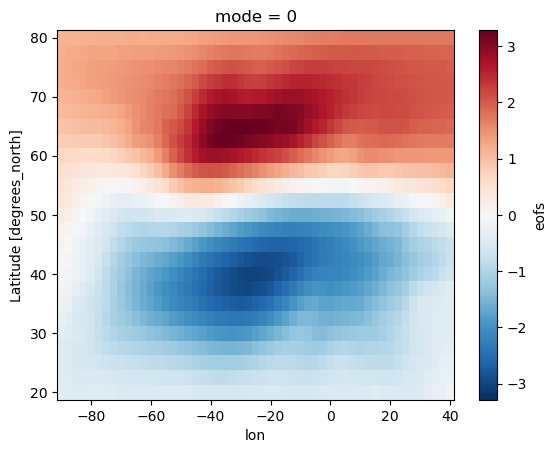

max abs difference: 8.202121212581309
mean abs difference: 2.9061871927756595


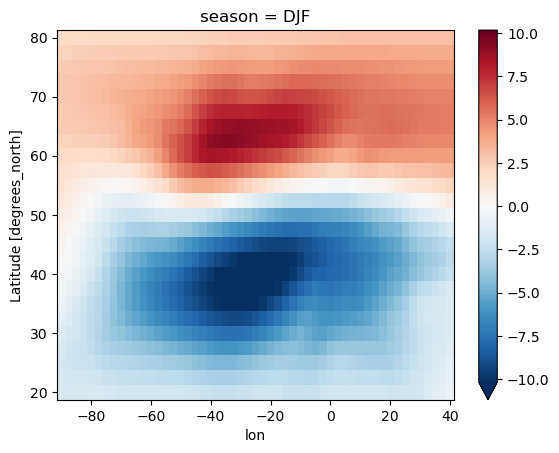

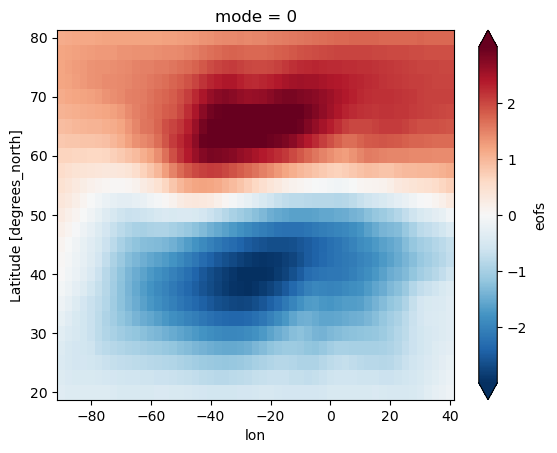

In [4]:
max_modes=1
had_anom = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/psl_anomalies/historical/HadGEM3-GC31-LL/psl_mon_historical_HadGEM3-GC31-LL_r52i1p1f3_DJF_anomaly_1850-2014.nc')['psl']
had_anom = had_anom.sel(lat=slice(20,80), lon=slice(-90,40))
had_anom = had_anom.rename({'year': 'time'})
had_anom = had_anom / 100

anomaly_trans = had_anom.transpose('time', 'lat', 'lon')

coslat = np.cos(np.deg2rad(anomaly_trans.coords['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[...,np.newaxis]

solver = Eof(anomaly_trans, weights=wgts)
EOF0 = solver.eofs(neofs=max_modes)

eigs = solver.eigenvalues(neigs=max_modes)
eigs_np = np.sqrt(eigs.values)  # convert to NumPy
EOF_phys = EOF0 * eigs_np[:, np.newaxis, np.newaxis]

# 4. Get PCs with unit variance (dimensionless indices)
pcs_norm = solver.pcs(npcs=max_modes, pcscaling=2)

# 5. Variance explained (same regardless of scaling)
varfrac = solver.varianceFraction(neigs=max_modes) * 100

print("Variance explained (%):", varfrac.values)
print("EOF_phys units: hPa, pcs_norm units: dimensionless")

EOF_phys.plot()
plt.show()
# make pcs_norm an xarray DataArray aligned with anomaly_trans.time
pcs_da = xr.DataArray(pcs_norm[:, 0], dims=['time'], coords={'time': anomaly_trans.time})  # mode 0

# regression onto normalized PC: mean over time of anomaly * pc / var(pc)
# but pcs_norm already unit variance so dividing by var(pc) unnecessary; we do mean(X * pc)
reg_map = (anomaly_trans * pcs_da).mean(dim='time')  # DataArray lat,lon

# pick the mode-0 EOF_phys
e_phys_mode0 = EOF_phys.sel(mode=0)

coslat = np.cos(np.deg2rad(anomaly_trans.lat))
w2d, _ = xr.broadcast(coslat, anomaly_trans)

# weighted regression: sum(X * pc * w) / sum(pc^2)
# but since pcs_norm has unit variance, denominator is just sum(w)
reg_map_w = (anomaly_trans * pcs_da * w2d).sum(dim='time') / w2d.sum()

# compare
diff = np.abs(reg_map_w - e_phys_mode0)
print("max abs difference:", float(diff.max().values))
print("mean abs difference:", float(diff.mean().values))

# quick visual check (optional)
reg_map_w.plot(robust=True)
plt.show()
e_phys_mode0.plot(robust=True)
plt.show()

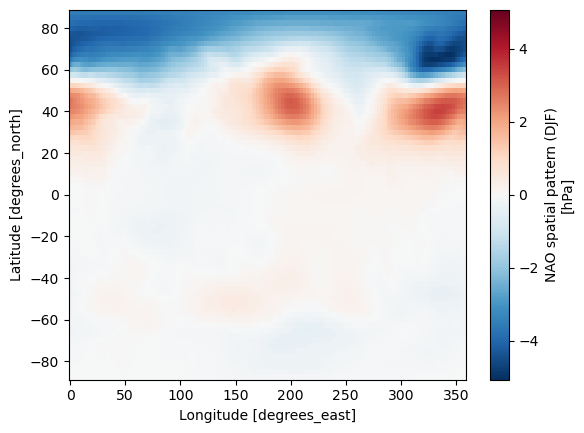

In [5]:
CVDP = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/CVDP_outputs/NAO/historical/historical_NAO/HadGEM3-GC31-LL_r52i1p1f3.cvdp_data.1850-2014.nc')
CVDP['nao_pattern_djf'].plot()#.sel(lat=slice(20,80), lon=slice(-90,40)).plot()

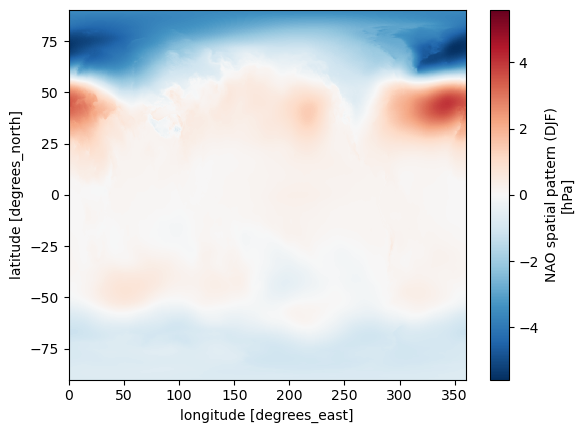

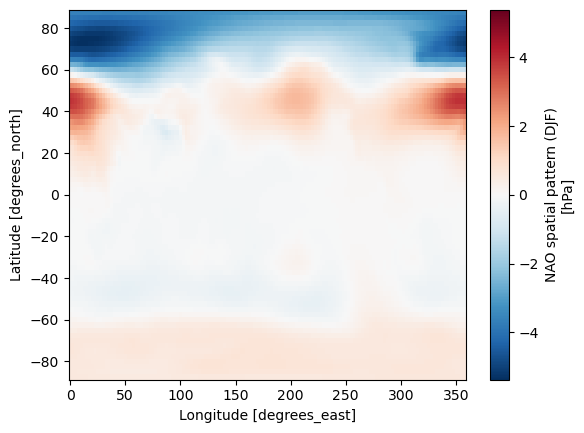

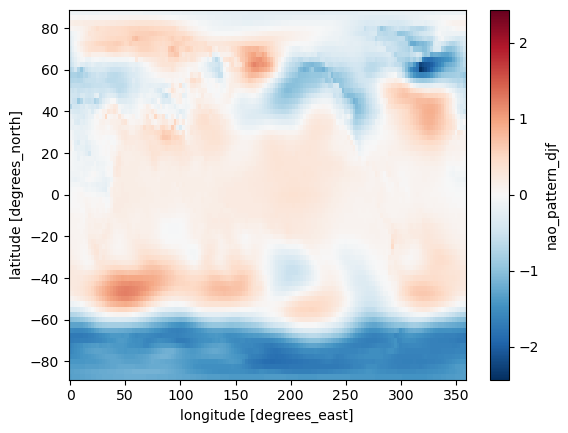

In [10]:
CVDP_era5 = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/CVDP_outputs/NAO/historical/historical_NAO/ERA5_1.cvdp_data.1940-2014.nc')
CVDP_era5['nao_pattern_djf'].plot()
plt.show()


CVDP_Had = xr.open_dataset('/gws/nopw/j04/extant/users/slbennie/CVDP_outputs/NAO/historical/historical_NAO/CanESM5_r36i1p2f1.cvdp_data.1850-2014.nc')
CVDP_Had['nao_pattern_djf'].plot()
plt.show()

(CVDP_era5['nao_pattern_djf']-CVDP_Had['nao_pattern_djf']).plot()
plt.show()
